# RFM ANALYSIS
<b>RFM Analysis </b>has been there in the market for so long. Customer segmentaation on the basis of their RFM Scores was done in past too but manually or even computaionally but not on such large scale as it is requird today. Understanding customer behaviour and approach towards the seller is done on basis of the trasaction coustomer has done with the seller. All this helps the seller to analyse their business and grow as per the customer requirements. As the axiom of the Sales and the Corporate world <b>'20% of the customer birng the 80% of the business'</b>. But the seller can't stop thinking about the rest 80% of the customer. One must keep its customer happy to grow in business and each customer is important. So there has to be some way to look into the sales and customer relations to make sense from it about customer. This is the motivation for any customer analysis. <b>RFM Analysis</b> rates the customer on three grounds <b>recency, frequency, monetary </b>. That means that customer is the best customer who has bought recently, frequntly and has spent large amount. To reach to the goal let's look at the example. Data here is used from kaggle (https://www.kaggle.com/hendraherviawan/customer-segmentation-using-rfm-analysis-r).
#### Imports !

In [115]:
import pandas
import numpy
import matplotlib.pyplot as plt
import squarify

In [116]:
data = pandas.read_csv('./data.csv',encoding='unicode escape')

In [117]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [119]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


It seems from the data.info() that there are <b>135080</b> rows which have <b>NaN</b>s in <b>CustomerID</b> field

In [120]:
data = data.drop(data[data['CustomerID'].isna()].index)

In [121]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Discarding unnecessary fields and considering only important ones for further analysis.

In [122]:
intermediate_data = data[['CustomerID','UnitPrice','Quantity','InvoiceDate','InvoiceNo']]

In [87]:
intermediate_data['Total'] = intermediate_data['UnitPrice']*intermediate_data['Quantity']

c:\users\prathamesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [123]:
intermediate_data.head(5)

,CustomerID,UnitPrice,Quantity,InvoiceDate,InvoiceNo
0,17850.0,2.55,6,12/1/2010 8:26,536365
1,17850.0,3.39,6,12/1/2010 8:26,536365
2,17850.0,2.75,8,12/1/2010 8:26,536365
3,17850.0,3.39,6,12/1/2010 8:26,536365
4,17850.0,3.39,6,12/1/2010 8:26,536365


In [124]:
intermediate_data['InvoiceDate'] = pandas.to_datetime(intermediate_data['InvoiceDate'])
intermediate_data['Today']=pandas.Timestamp('20111231')

c:\users\prathamesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\prathamesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


After calcualating Total amount spent by the customer then it is seen that there are some records where the

In [92]:
intermediate_data=intermediate_data.drop(intermediate_data[intermediate_data['Total']<0].index)

In [93]:
intermediate_data

,CustomerID,UnitPrice,Quantity,InvoiceDate,InvoiceNo,Total,Today
0,17850.0,2.55,6,2010-12-01 08:26:00,536365,15.30,2011-12-31
1,17850.0,3.39,6,2010-12-01 08:26:00,536365,20.34,2011-12-31
2,17850.0,2.75,8,2010-12-01 08:26:00,536365,22.00,2011-12-31
3,17850.0,3.39,6,2010-12-01 08:26:00,536365,20.34,2011-12-31
4,17850.0,3.39,6,2010-12-01 08:26:00,536365,20.34,2011-12-31
...,...,...,...,...,...,...,...
541904,12680.0,0.85,12,2011-12-09 12:50:00,581587,10.20,2011-12-31
541905,12680.0,2.10,6,2011-12-09 12:50:00,581587,12.60,2011-12-31
541906,12680.0,4.15,4,2011-12-09 12:50:00,581587,16.60,2011-12-31
541907,12680.0,4.15,4,2011-12-09 12:50:00,581587,16.60,2011-12-31


In [94]:
intermediate_data.dtypes

CustomerID            float64
UnitPrice             float64
Quantity                int64
InvoiceDate    datetime64[ns]
InvoiceNo              object
Total                 float64
Today          datetime64[ns]
dtype: object

In [95]:
intermediate_data['recency'] = (intermediate_data.Today-intermediate_data.InvoiceDate).dt.days

In [96]:
intermediate_data

,CustomerID,UnitPrice,Quantity,InvoiceDate,InvoiceNo,Total,Today,recency
0,17850.0,2.55,6,2010-12-01 08:26:00,536365,15.30,2011-12-31,394
1,17850.0,3.39,6,2010-12-01 08:26:00,536365,20.34,2011-12-31,394
2,17850.0,2.75,8,2010-12-01 08:26:00,536365,22.00,2011-12-31,394
3,17850.0,3.39,6,2010-12-01 08:26:00,536365,20.34,2011-12-31,394
4,17850.0,3.39,6,2010-12-01 08:26:00,536365,20.34,2011-12-31,394
...,...,...,...,...,...,...,...,...
541904,12680.0,0.85,12,2011-12-09 12:50:00,581587,10.20,2011-12-31,21
541905,12680.0,2.10,6,2011-12-09 12:50:00,581587,12.60,2011-12-31,21
541906,12680.0,4.15,4,2011-12-09 12:50:00,581587,16.60,2011-12-31,21
541907,12680.0,4.15,4,2011-12-09 12:50:00,581587,16.60,2011-12-31,21


In [97]:
actual_data = pandas.DataFrame()

In [98]:
recency = pandas.DataFrame(intermediate_data.groupby(intermediate_data['CustomerID']).min()['recency'])
frequency = pandas.DataFrame(intermediate_data.groupby(intermediate_data['CustomerID']).count()['InvoiceNo'])
amount = pandas.DataFrame(intermediate_data.groupby(intermediate_data['CustomerID']).sum()['Total'])

In [99]:
actual_data = pandas.merge(recency,frequency,how='outer',left_index=True,right_index=True)

In [100]:
actual_data = pandas.merge(actual_data,amount,how='outer',left_index=True,right_index=True)

In [101]:
actual_data.columns = ['recency', 'frequency', 'monetary']

In [102]:
quintiles = actual_data.quantile(q=[0.20,0.40,0.60,0.80])

In [103]:
quintiles['recency'][.2]

34.200000000000045

In [104]:
def recency_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    if x <= quintiles['recency'][.4]:
        return 4
    if x <= quintiles['recency'][.6]:
        return 3
    if x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1
    
def freq_monetary_score(x,c):
    if x <= quintiles[c][.2]:
        return 1
    if x <= quintiles[c][.4]:
        return 2
    if x <= quintiles[c][.6]:
        return 3
    if x <= quintiles[c][.8]:
        return 4
    else:
        return 5

In [105]:
actual_data['R'] = actual_data['recency'].apply(lambda x : recency_score(x))
actual_data['F'] = actual_data['frequency'].apply(lambda x : freq_monetary_score(x,'frequency'))
actual_data['M'] = actual_data['monetary'].apply(lambda x : freq_monetary_score(x,'monetary'))


In [106]:
actual_data

,recency,frequency,monetary,R,F,M
CustomerID,,,,,,
12346.0,346,1,77183.60,1,1,5
12347.0,23,182,4310.00,5,5,5
12348.0,96,31,1797.24,2,3,4
12349.0,39,73,1757.55,4,4,4
12350.0,331,17,334.40,1,2,2
...,...,...,...,...,...,...
18280.0,298,10,180.60,1,1,1
18281.0,201,7,80.82,1,1,1
18282.0,28,12,178.05,5,1,1


In [107]:
actual_data['RFM Score'] = actual_data['R'].map(str)+actual_data['F'].map(str)+actual_data['M'].map(str)

In [108]:
actual_data

,recency,frequency,monetary,R,F,M,RFM Score
CustomerID,,,,,,,
12346.0,346,1,77183.60,1,1,5,115
12347.0,23,182,4310.00,5,5,5,555
12348.0,96,31,1797.24,2,3,4,234
12349.0,39,73,1757.55,4,4,4,444
12350.0,331,17,334.40,1,2,2,122
...,...,...,...,...,...,...,...
18280.0,298,10,180.60,1,1,1,111
18281.0,201,7,80.82,1,1,1,111
18282.0,28,12,178.05,5,1,1,511


In [109]:
actual_data['RFM Score'] = pandas.to_numeric(actual_data['RFM Score'])

In [110]:
cust_seg = actual_data.groupby(['R','F']).count()['M']

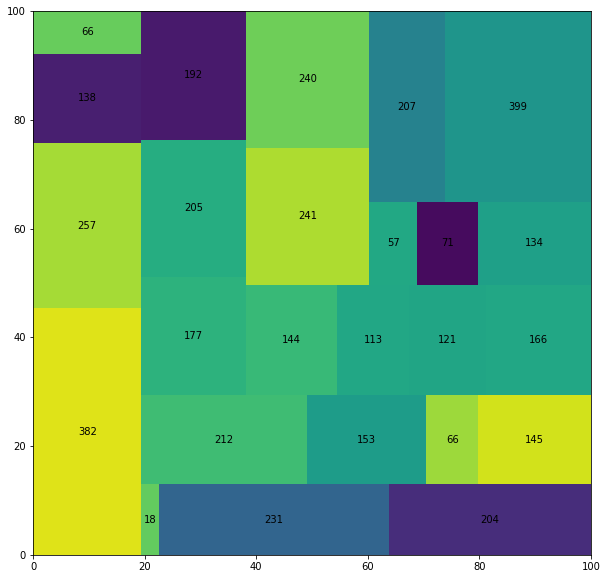

In [111]:
plt.figure(figsize=(10,10))
squarify.plot(cust_seg,label=cust_seg)